# Matthew Hansen

## What statistics are required to have an MVP level season? Does winning an MVP mean the player will have a good career?

I am interested in analyzing the statistics of NHL MVPs to find similar stats to understand what is needed to be an MVP. In addition I want to see what type of careers an MVP has.

### Step 1: Import the the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
nhl_stats = pd.read_csv("../data/raw/NHL_Players_Statistics.csv", sep=';')
nhl_stats

,Name,Date_of_birth,SEASON_year,SEASON,TEAM,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,...,Saves,Save_Percentage,Shutouts,Position,Height,Weight,Body_mass_index,Place_of_birth,Age,Experience
0,Aaron Downey,1974-08-27,2000,'99-'00,BOS,1,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",26,1
1,Aaron Downey,1974-08-27,2001,'00-'01,CHI,3,0.0,0.0,0.0,-1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",27,2
2,Aaron Downey,1974-08-27,2002,'01-'02,CHI,36,1.0,0.0,1.0,-2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",28,3
3,Aaron Downey,1974-08-27,2003,'02-'03,DAL,43,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",29,4
4,Aaron Downey,1974-08-27,2004,'03-'04,DAL,37,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,Zigmund Palffy,1972-05-05,2001,'00-'01,LA,73,38.0,51.0,89.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,29,8
27315,Zigmund Palffy,1972-05-05,2002,'01-'02,LA,63,32.0,27.0,59.0,5.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,30,9
27316,Zigmund Palffy,1972-05-05,2003,'02-'03,LA,76,37.0,48.0,85.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,31,10
27317,Zigmund Palffy,1972-05-05,2004,'03-'04,LA,35,16.0,25.0,41.0,18.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,32,11


## Task 1: Conduct an exploratory data analysis (EDA)

In [2]:
print("Number of rows and columns respectively:", nhl_stats.shape)
print("Columns in the dataset:", nhl_stats.columns)

Number of rows and columns respectively: (27319, 40)
Columns in the dataset: Index(['Name', 'Date_of_birth', 'SEASON_year', 'SEASON', 'TEAM',
       'Games_Played', 'Goals', 'Assists', 'Points', 'PlusMinus_Ratings',
       'Penalty_Minutes', 'Shots_on_Goal', 'Shooting_Percentage',
       'PowerPlay_Goals', 'PowerPlay_Assists', 'Short_Goals', 'Short_Assists',
       'Game_Winning_Goals', 'Game_Tying_Goals', 'Time_on_Ice_per_Game',
       'Production', 'Number', 'Games_Started', 'Wins', 'Losses', 'Ties',
       'Overtime_Losses', 'Goals_Against', 'Goals_Against_Average',
       'Shots_Against', 'Saves', 'Save_Percentage', 'Shutouts', 'Position',
       'Height', 'Weight', 'Body_mass_index', 'Place_of_birth', 'Age',
       'Experience'],
      dtype='object')


In [3]:
nhl_stats.describe(include=['float64', 'int64'])

,SEASON_year,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,Penalty_Minutes,Shots_on_Goal,Shooting_Percentage,PowerPlay_Goals,...,Goals_Against_Average,Shots_Against,Saves,Save_Percentage,Shutouts,Height,Weight,Body_mass_index,Age,Experience
count,27319.000000,27319.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,...,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,27319.000000,27319.000000,27319.000000,27319.000000,27319.000000
mean,2003.060837,44.236246,7.752681,13.113297,20.865979,-0.094509,40.008669,76.981211,8.095117,2.034876,...,3.097958,777.134684,702.781486,0.893422,1.533174,185.343351,91.834181,26.717157,27.678136,6.567078
std,8.958513,28.161504,9.835740,14.395609,23.063433,10.255430,45.200093,71.567047,7.809799,3.521412,...,3.828691,622.315756,566.764797,0.063274,2.051259,5.262080,7.180618,1.461931,4.447828,4.511258
min,1976.000000,1.000000,0.000000,0.000000,0.000000,-61.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,50.000000,14.200000,19.000000,1.000000
25%,1996.000000,16.000000,1.000000,2.000000,3.000000,-5.000000,8.000000,17.000000,2.600000,0.000000,...,2.460000,202.000000,181.000000,0.885000,0.000000,183.000000,87.000000,25.800000,24.000000,3.000000
50%,2003.000000,47.000000,4.000000,8.000000,13.000000,-1.000000,27.000000,58.000000,7.400000,0.000000,...,2.860000,650.000000,581.000000,0.902000,1.000000,185.000000,91.000000,26.600000,27.000000,6.000000
75%,2010.000000,72.000000,11.000000,20.000000,32.000000,4.000000,54.000000,119.000000,12.000000,3.000000,...,3.390000,1251.000000,1133.000000,0.914000,2.000000,188.000000,97.000000,27.700000,31.000000,9.000000
max,2020.000000,84.000000,92.000000,163.000000,215.000000,98.000000,408.000000,528.000000,100.000000,31.000000,...,184.620000,2488.000000,2303.000000,1.000000,13.000000,206.000000,120.000000,31.400000,48.000000,28.000000


**Analysis:** By looking at the mean we can see the average player in the NHL. 44 games played, 8 goals, 13 assists, and 21 points per season.

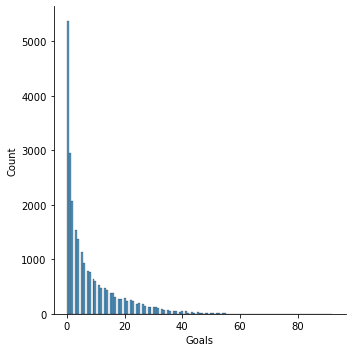

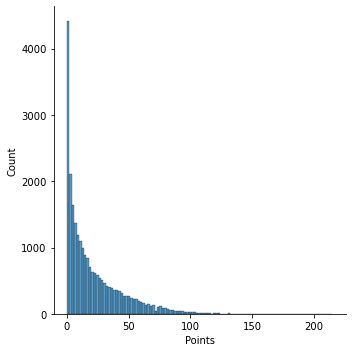

In [4]:
sns.displot(nhl_stats["Goals"])
sns.displot(nhl_stats["Points"])

These graphs show how rare it is for a player to score 40 goals or have 100 points

## Task 2-3: Setting up an analysis pipeline

### To complete step 3, I will import my functions

In [5]:
import project_functions2 as pf

The first function imports the dataset and loads it as a pandas dataframe

In [6]:
data = pf.unprocessed("../data/raw/NHL_Players_Statistics.csv")
data

,Name,Date_of_birth,SEASON_year,SEASON,TEAM,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,...,Saves,Save_Percentage,Shutouts,Position,Height,Weight,Body_mass_index,Place_of_birth,Age,Experience
0,Aaron Downey,1974-08-27,2000,'99-'00,BOS,1,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",26,1
1,Aaron Downey,1974-08-27,2001,'00-'01,CHI,3,0.0,0.0,0.0,-1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",27,2
2,Aaron Downey,1974-08-27,2002,'01-'02,CHI,36,1.0,0.0,1.0,-2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",28,3
3,Aaron Downey,1974-08-27,2003,'02-'03,DAL,43,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",29,4
4,Aaron Downey,1974-08-27,2004,'03-'04,DAL,37,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,Zigmund Palffy,1972-05-05,2001,'00-'01,LA,73,38.0,51.0,89.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,29,8
27315,Zigmund Palffy,1972-05-05,2002,'01-'02,LA,63,32.0,27.0,59.0,5.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,30,9
27316,Zigmund Palffy,1972-05-05,2003,'02-'03,LA,76,37.0,48.0,85.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,31,10
27317,Zigmund Palffy,1972-05-05,2004,'03-'04,LA,35,16.0,25.0,41.0,18.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,32,11


The second function is to complete task 2 of creating the analysis pipeline. It starts to load, clean, process and wrangle the data.

It drops all of the columns that will not be used in my analysis. In addition, it removes all data of the years before 1988. This is so that I can look at the career stats of each MVP winner from 2001-2018.

In [7]:
initial_clean = pf.intial_process("../data/raw/NHL_Players_Statistics.csv")
initial_clean

,Name,SEASON_year,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,Game_Winning_Goals,Position,Height,Weight,Age,Experience
0,Aaron Downey,2000,1,0.0,0.0,0.0,0.0,0.0,Right_wing,185,98,26,1
1,Aaron Downey,2001,3,0.0,0.0,0.0,-1.0,0.0,Right_wing,185,98,27,2
2,Aaron Downey,2002,36,1.0,0.0,1.0,-2.0,1.0,Right_wing,185,98,28,3
3,Aaron Downey,2003,43,1.0,1.0,2.0,1.0,0.0,Right_wing,185,98,29,4
4,Aaron Downey,2004,37,1.0,1.0,2.0,2.0,1.0,Right_wing,185,98,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26239,Zigmund Palffy,2001,73,38.0,51.0,89.0,22.0,8.0,Right_wing,178,85,29,8
26240,Zigmund Palffy,2002,63,32.0,27.0,59.0,5.0,6.0,Right_wing,178,85,30,9
26241,Zigmund Palffy,2003,76,37.0,48.0,85.0,22.0,5.0,Right_wing,178,85,31,10
26242,Zigmund Palffy,2004,35,16.0,25.0,41.0,18.0,2.0,Right_wing,178,85,32,11


This final function is the most important for my analysis. I need to identify which player won the MVP in each year. In order to do this I created a list of the player that won the award and the season they won it in.

It then merges the new list with the original datafile. This drops every row except the season statistics for an MVP. 

One player was traded mid season so he had two rows for himself. This function adds up his two seperate columns to give his season total.

In [8]:
mvp_skaters = pf.mvp_seasons("../data/raw/NHL_Players_Statistics.csv")
mvp_skaters

,Name,SEASON_year,Position,Height,Weight,Age,Experience,MVP,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,Game_Winning_Goals
0,Alex Ovechkin,2008,Left_wing,190,108,23,3,Yes,82,65.0,47.0,112.0,28.0,11.0
1,Alex Ovechkin,2009,Left_wing,190,108,24,4,Yes,79,56.0,54.0,110.0,8.0,10.0
2,Alex Ovechkin,2013,Left_wing,190,108,28,8,Yes,48,32.0,24.0,56.0,2.0,4.0
3,Corey Perry,2011,Right_wing,190,95,26,6,Yes,82,50.0,48.0,98.0,9.0,11.0
4,Evgeni Malkin,2012,Centre,190,88,26,6,Yes,75,50.0,59.0,109.0,18.0,9.0
5,Henrik Sedin,2010,Centre,188,85,30,10,Yes,82,29.0,83.0,112.0,35.0,5.0
6,Joe Sakic,2001,Centre,180,88,32,13,Yes,82,54.0,64.0,118.0,45.0,12.0
7,Joe Thornton,2006,Centre,193,100,27,9,Yes,81,29.0,96.0,125.0,31.0,6.0
8,Martin St. Louis,2004,Right_wing,173,80,29,6,Yes,82,38.0,56.0,94.0,35.0,7.0
9,Patrick Kane,2016,Right_wing,178,80,28,9,Yes,82,46.0,60.0,106.0,17.0,9.0


**This list excludes goalies because comparing their stats to skaters is implausible**

In [9]:
mvp_skaters[["Age","Goals","Points","PlusMinus_Ratings"]].describe()

,Age,Goals,Points,PlusMinus_Ratings
count,14.000000,14.000000,14.000000,14.00000
mean,26.928571,42.071429,104.500000,23.00000
std,3.099982,11.492233,16.750431,14.93576
min,20.000000,29.000000,56.000000,2.00000
25%,26.000000,33.000000,99.500000,11.00000
50%,27.000000,38.500000,107.500000,18.00000
75%,28.750000,50.000000,112.000000,34.00000
max,32.000000,65.000000,125.000000,52.00000


There is some key information that can be identified from this. Firstly, the mean of each players stats provides an idea of what is needed to be an MVP. 

Second, the average age hints towards when a player is at peak performance. A common idea in sports is that a player is at their prime at the age of 27. This analysis agrees with that

The average total age for an MVP is: **26.9**

The average total goals for an MVP is: **42.1**

The average total points for an MVP is: **104.5**

The average total +/- for an MVP is: **+23**

**By using a series of scatterplots we can compare the MVPs on each statistical element**

<AxesSubplot:xlabel='Game_Winning_Goals', ylabel='Name'>

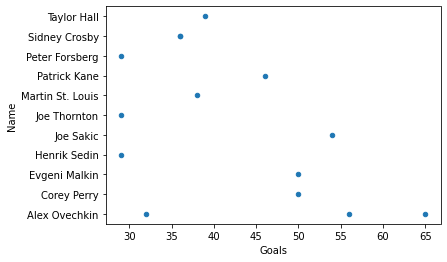

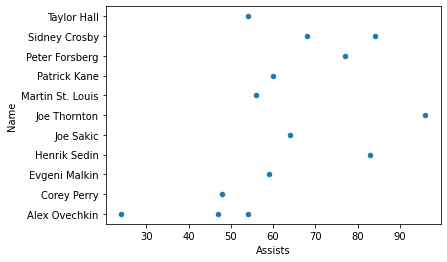

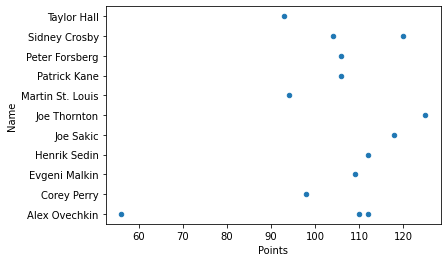

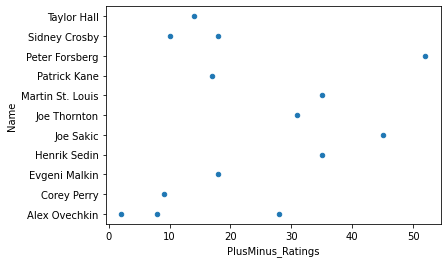

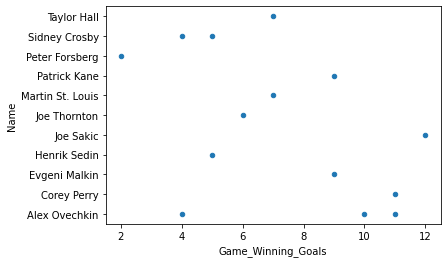

In [10]:
mvp_skaters.plot(kind='scatter', x='Goals', y='Name')
mvp_skaters.plot(kind='scatter', x='Assists', y='Name')
mvp_skaters.plot(kind='scatter', x='Points', y='Name')
mvp_skaters.plot(kind='scatter', x='PlusMinus_Ratings', y='Name')
mvp_skaters.plot(kind='scatter', x='Game_Winning_Goals', y='Name')

We can see that there are also lower thresholds for specific statistics. In addition, we can see that there is a variety in performance from player to player. 

One thing to point out is the outliers of Alex Ovechkin on the bottom row. The 2015 season missed half of the games due to a lockout.

In [11]:
mvp_careers = {
    'Name': ['Taylor Hall', 'Connor McDavid', 'Patrick Kane', 'Sidney Crosby', 'Alex Ovechkin', 'Evgeni Malkin', 'Corey Perry', 'Henrik Sedin', 'Joe Thornton', 'Martin St. Louis', 'Peter Forsberg', 'Joe Sakic'],
}
pd.DataFrame.from_dict(mvp_careers)

,Name
0,Taylor Hall
1,Connor McDavid
2,Patrick Kane
3,Sidney Crosby
4,Alex Ovechkin
5,Evgeni Malkin
6,Corey Perry
7,Henrik Sedin
8,Joe Thornton
9,Martin St. Louis


**Now I am creating a new dataframe that shows the career numbers of each player that has won an MVP**

In [12]:
mvp_df = pd.DataFrame(mvp_careers)
nhl_analysis_merged_careers = pd.merge(data, mvp_df)
nhl_analysis_merged_careers2 = nhl_analysis_merged_careers.groupby(["Name"],as_index=False)[["Games_Played","Goals", "Assists","Points", "PlusMinus_Ratings", "Game_Winning_Goals"]].sum()
nhl_analysis_merged_careers2

,Name,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,Game_Winning_Goals
0,Alex Ovechkin,1152,706.0,572.0,1278.0,82.0,110.0
1,Corey Perry,1045,377.0,420.0,797.0,74.0,64.0
2,Evgeni Malkin,907,416.0,660.0,1076.0,73.0,73.0
3,Henrik Sedin,1330,240.0,830.0,1070.0,165.0,38.0
4,Joe Sakic,1378,625.0,1016.0,1641.0,30.0,86.0
5,Joe Thornton,1636,420.0,1089.0,1509.0,186.0,67.0
6,Martin St. Louis,1134,391.0,642.0,1033.0,37.0,66.0
7,Patrick Kane,973,389.0,633.0,1022.0,69.0,62.0
8,Peter Forsberg,708,249.0,636.0,885.0,237.0,43.0
9,Sidney Crosby,984,462.0,801.0,1263.0,175.0,64.0


In [13]:
nhl_analysis_merged_careers2[["Goals","Assists","Points","PlusMinus_Ratings"]].describe()

,Goals,Assists,Points,PlusMinus_Ratings
count,11.000000,11.000000,11.000000,11.000000
mean,408.454545,694.909091,1103.363636,98.727273
std,151.733558,226.351697,309.280220,82.292273
min,218.000000,345.000000,563.000000,-42.000000
25%,313.000000,602.500000,953.500000,53.000000
50%,391.000000,642.000000,1070.000000,74.000000
75%,441.000000,815.500000,1270.500000,170.000000
max,706.000000,1089.000000,1641.000000,237.000000


Again we can look at the mean for each column to find the average career for an MVP. 

In [14]:
games_total = nhl_analysis_merged_careers2["Games_Played"].sum()
goals_total = nhl_analysis_merged_careers2["Goals"].sum()
assists_total = nhl_analysis_merged_careers2["Assists"].sum()
points_total = nhl_analysis_merged_careers2["Points"].sum()
goals_per_game = goals_total/games_total
assists_per_game = assists_total/games_total
points_per_game = points_total/games_total
print("Average goals per game is: {:.3f}".format(goals_per_game))
print("Average assists per game is: {:.3f}".format(assists_per_game))
print("Average points per game is: {:.3f}".format(points_per_game))

Average goals per game is: 0.378
Average assists per game is: 0.644
Average points per game is: 1.022


We can see that over the course of the career of an MVP, on average they will score more than one point every game. 

In addition, we can see from the dataframe that all but one player is a career positive when on the ice. 

70% of the players reached the significant 1000 point mark as well.

<AxesSubplot:xlabel='Game_Winning_Goals', ylabel='Name'>

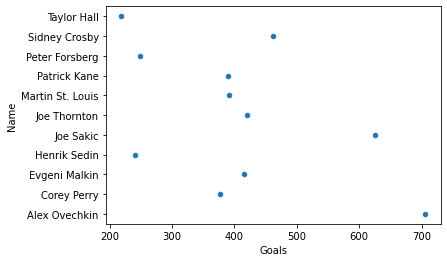

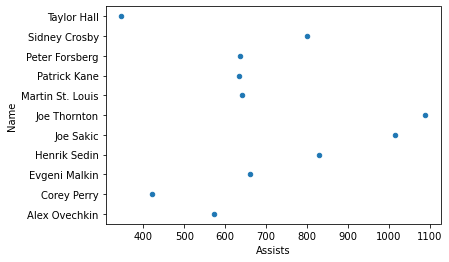

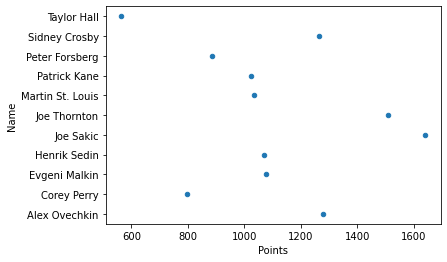

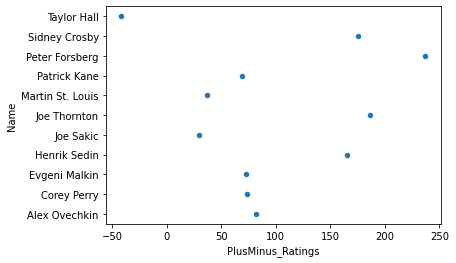

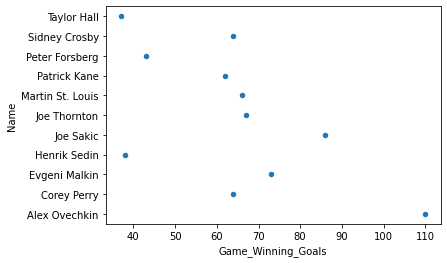

In [15]:
nhl_analysis_merged_careers2.plot(kind='scatter', x='Goals', y='Name')
nhl_analysis_merged_careers2.plot(kind='scatter', x='Assists', y='Name')
nhl_analysis_merged_careers2.plot(kind='scatter', x='Points', y='Name')
nhl_analysis_merged_careers2.plot(kind='scatter', x='PlusMinus_Ratings', y='Name')
nhl_analysis_merged_careers2.plot(kind='scatter', x='Game_Winning_Goals', y='Name')

Another set of scatterplots compares the career statistics of each player

<AxesSubplot:title={'center':'BoxPlot of Weighted Scores by Genre'}, xlabel='Points', ylabel='Genre'>

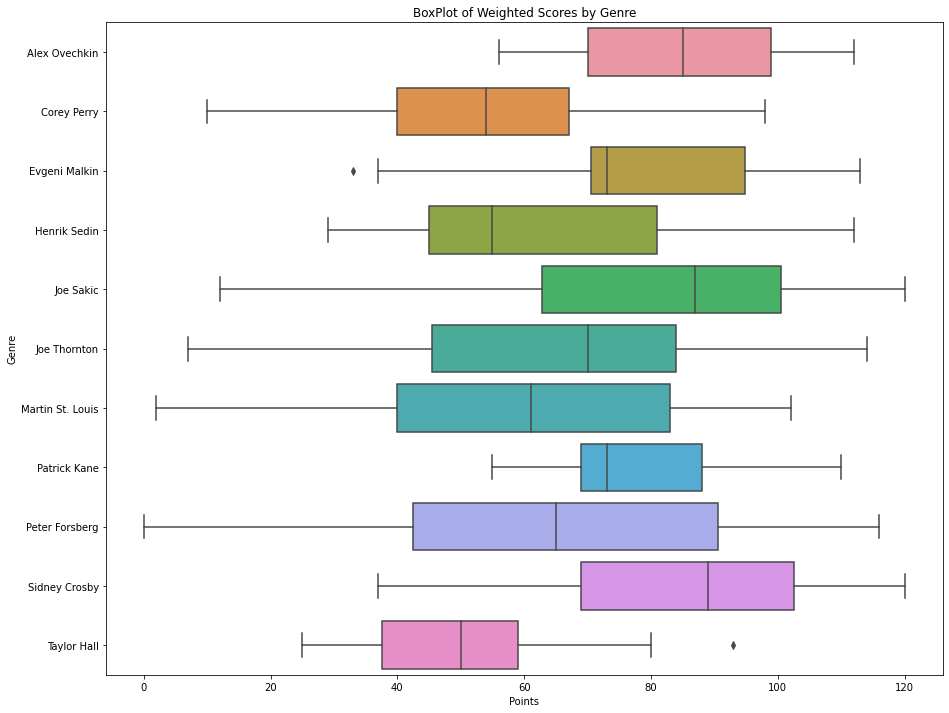

In [16]:
mvp_df = pd.DataFrame(mvp_careers)
nhl_analysis_merged_seasons = pd.merge(data, mvp_df)
a4_dims = (15, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(x="Points", y="Name", data=nhl_analysis_merged_seasons)
ax.set_title('BoxPlot of Weighted Scores by Genre')
ax.set_xlabel("Points")
ax.set_ylabel("Genre")
ax

Finally, by using a histogram the average points of each player are shown more clearly. 

This visual shows the most common point totals and identifies any outliers. 

It is important to note that the outlier for Taylor Hall is the season that he won MVP. This implies that his MVP season was a fluke and that he is unlikely to repeat that season or compare equally with the other players

## Concluding my analysis

By analysing the statistics of each MVP winner and using an assortment of graphing tools I have determined a framework of what is required to be an MVP. The average goals and points for an MVP are 42 and 105 respectively. In addition, from the plus minus statistic it is easy to tell that MVPs contribute to more goals for their team than the amount they give up.

After that first analysis, I then observed the overall careers of each player that won the award. A winner of the award is expected to have a fruitful career. By looking at the career statistics I found that each player finishes with well over 1000 points and 400 goals. These are massive milestones for any player.

Finally, the histogram shows the consistency of each player. It provides a range of points that the player usually scores in a season. The main thing out of this visual is that Taylor Hall has not consistently performed at his MVP level. This implies that he will not live up to the careers of other MVPs.

In conclusion, MVP is a difficult award to achieve and that is clear from this analysis. Each of these players are some of the best of all time.

In [17]:
nhl_analysis_merged_careers2.to_csv("analysis2_processed.csv", index = False)